In [1]:
# Import Important Libraries

import pandas as pd
import numpy as np


In [2]:
# Importing Dataset

df=pd.read_csv(r"https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.shape

(1303, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
# Checking duplicate rows

df.duplicated().sum()

0

In [6]:
# checking missing values 

df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
# Dropping the Unnamed column

df.drop(columns=["Unnamed: 0"],axis=1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [8]:
df["Ram"]=df["Ram"].str.replace("GB","")
df["Weight"]=df["Weight"].str.replace("kg","")

In [9]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [10]:
df["Ram"]=df["Ram"].astype("int32")
df["Weight"]=df["Weight"].astype("float32")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(1), object(7)
memory usage: 112.1+ KB


# EDA

# UNIVARIATE ANALYSIS

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

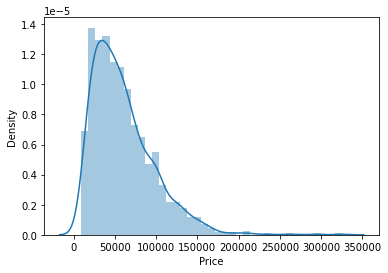

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(df["Price"])

<AxesSubplot:>

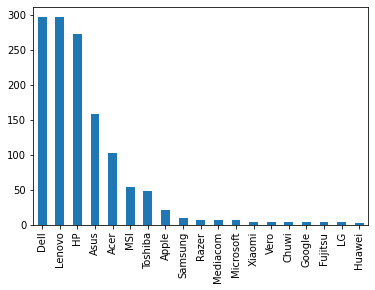

In [13]:
df["Company"].value_counts().plot(kind="bar")

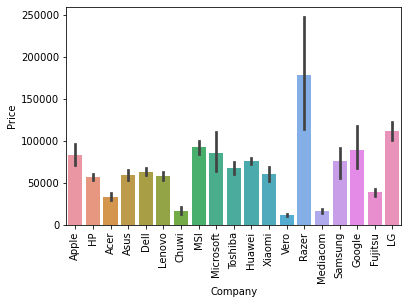

In [14]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<AxesSubplot:>

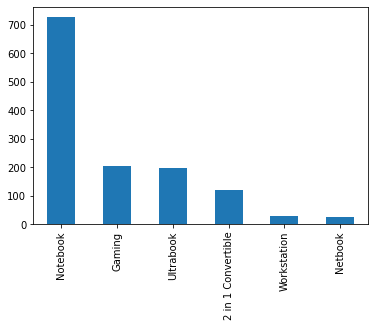

In [15]:
df["TypeName"].value_counts().plot(kind="bar")

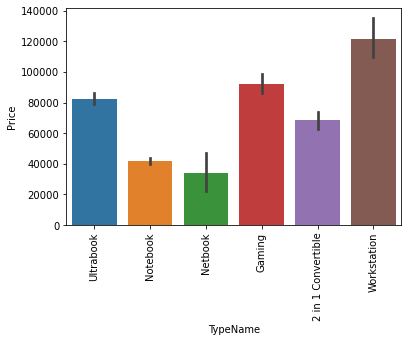

In [16]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

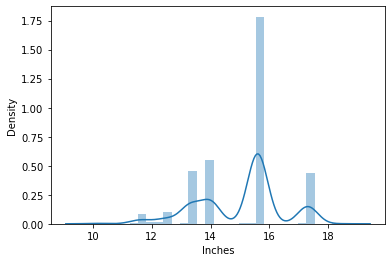

In [17]:
sns.distplot(df["Inches"])

<AxesSubplot:xlabel='Inches', ylabel='Price'>

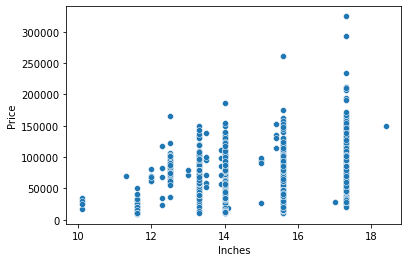

In [18]:
sns.scatterplot(x=df["Inches"],y=df["Price"])

In [19]:
df["ScreenResolution"].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [20]:
df["Touchscreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [21]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<AxesSubplot:>

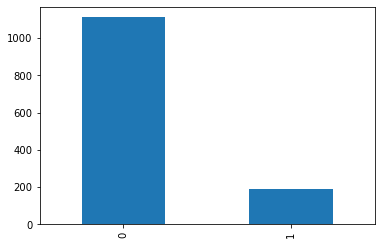

In [22]:
df["Touchscreen"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Touchscreen', ylabel='Price'>

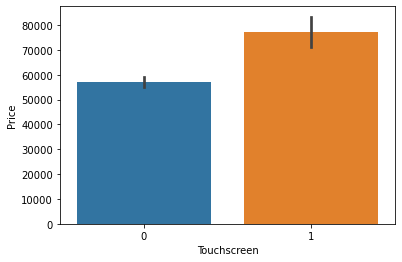

In [23]:
sns.barplot(x=df["Touchscreen"],y=df["Price"])

In [24]:
df["Ips"]=df["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [25]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<AxesSubplot:>

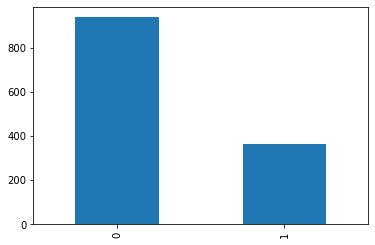

In [26]:
df["Ips"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Ips', ylabel='Price'>

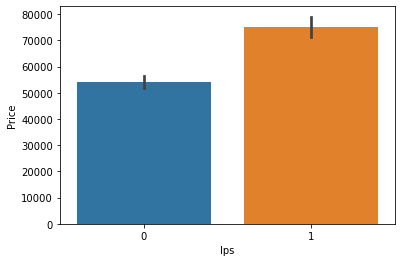

In [27]:
sns.barplot(x=df["Ips"],y=df["Price"])

In [28]:
new=df["ScreenResolution"].str.split("x",n=1,expand=True)

In [29]:
df["X_res"]=new[0]
df["Y_res"]=new[1]

In [30]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [31]:
df["X_res"]=df["X_res"].str.replace(",","").str.findall("(\d+\.?\d+)").apply(lambda x:x[0])

In [32]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   object 
 15  Y_res             1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64

In [34]:
df["X_res"]=df["X_res"].astype("int32")
df["Y_res"]=df["Y_res"].astype("int32")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price             1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   int32  
 15  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64

In [36]:
df.corr()["Price"]

Unnamed: 0     0.067984
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

In [37]:
# Ppi--> pixels per inches 
df["ppi"]=(((df["X_res"]**2)+(df["Y_res"]**2))**0.5/df["Inches"]).astype("float")

In [38]:
df.corr()["Price"]

Unnamed: 0     0.067984
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [39]:
df.drop(columns=["Unnamed: 0","ScreenResolution"],inplace=True)

In [40]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [41]:
df.drop(columns=["X_res","Y_res","Inches"],inplace=True)

In [42]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [43]:
df["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [44]:
df["Cpu Name"]=df["Cpu"].apply(lambda x:" ".join(x.split()[0:3]))

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [46]:
def fetch_processor(text):
    if text=="Intel Core i5" or text=="Intel Core i7" or text=="Intel Core i3":
        return text
    else:
        if text.split()[0]=="Intel":
            return"Other Intel Processor"
        else:
            return "AMD Processor"

In [47]:
df["Cpu brand"]=df["Cpu Name"].apply(fetch_processor)

In [48]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<AxesSubplot:>

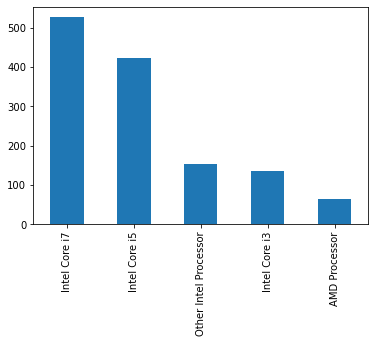

In [49]:
df["Cpu brand"].value_counts().plot(kind="bar")

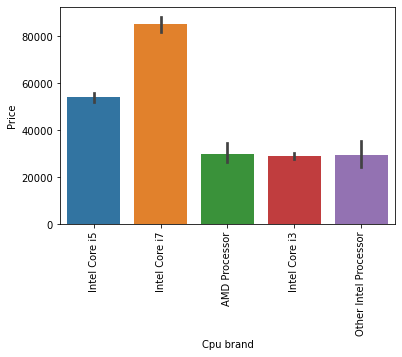

In [50]:
sns.barplot(x=df["Cpu brand"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [51]:
df.drop(columns=["Cpu","Cpu Name"],inplace=True)

In [52]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<AxesSubplot:>

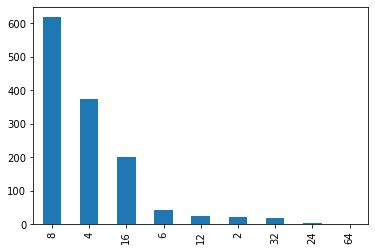

In [53]:
df["Ram"].value_counts().plot(kind="bar")

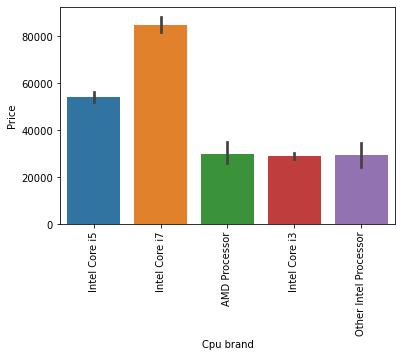

In [54]:
sns.barplot(x=df["Cpu brand"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [55]:
df["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [56]:
df["Memory"]=df["Memory"].astype(str).replace("\.0","",regex=True)
df["Memory"]=df["Memory"].str.replace("GB","")
df["Memory"]=df["Memory"].str.replace("TB","000")
new1=df["Memory"].str.split("+",n=1,expand=True)

df["first"]=new1[0]
df["first"]=df["first"].str.strip()

df["second"]=new1[1]

df["Layer1HDD"]=df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"]=df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"]=df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"]=df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["first"]=df["first"].str.replace(r"\D","")

df["second"].fillna("0",inplace=True)

df["Layer2HDD"]=df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"]=df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"]=df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"]=df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df["second"]=df["second"].str.replace(r"\D","")

df["first"]=df["first"].astype(int)
df["second"]=df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=["first","second","Layer1HDD","Layer2HDD","Layer1SSD","Layer2SSD","Layer1Hybrid","Layer2Hybrid",
                "Layer1Flash_Storage","Layer2Flash_Storage"],inplace=True)


C:\Users\ankit\AppData\Local\Temp\ipykernel_8716\9537912.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  df["first"]=df["first"].str.replace(r"\D","")
C:\Users\ankit\AppData\Local\Temp\ipykernel_8716\9537912.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  df["second"]=df["second"].str.replace(r"\D","")


In [57]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [58]:
df.drop(columns="Memory",inplace=True)

In [59]:
df.corr()["Price"]

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [60]:
df.drop(columns=["Hybrid","Flash_Storage"],inplace=True)

In [61]:
df["Gpu"].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [62]:
df["Gpu brand"]=df["Gpu"].apply(lambda x:x.split()[0])

In [63]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [64]:
df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [65]:
df=df[df["Gpu brand"]!="ARM"]

In [66]:
df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

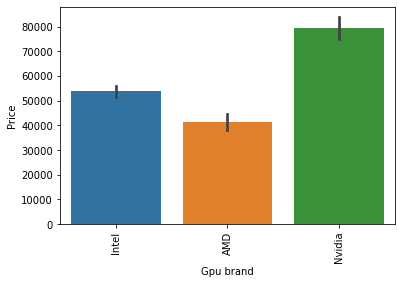

In [67]:
sns.barplot(x=df["Gpu brand"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [68]:
df.drop(columns=["Gpu"],inplace=True)

In [69]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [70]:
df["OpSys"].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

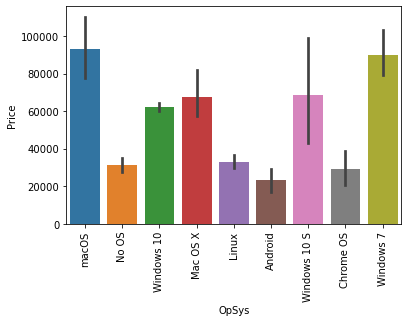

In [71]:
sns.barplot(x=df["OpSys"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [72]:
def cat_os(inp):
    if inp == "Windows 10" or inp == "Windows 7" or inp == "Windows 10 S":
        return "Windows"
    elif inp == "macOS" or inp == "Mac OS X":
        return "Mac"
    else:
        return "Others/Linux/No OS"

In [73]:
df["os"]=df["OpSys"].apply(cat_os)

In [74]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [75]:
df.drop(columns=["OpSys"],inplace=True)

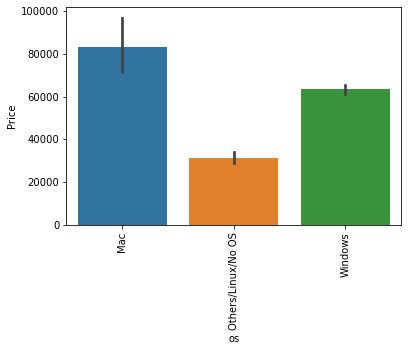

In [76]:
sns.barplot(x=df["os"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

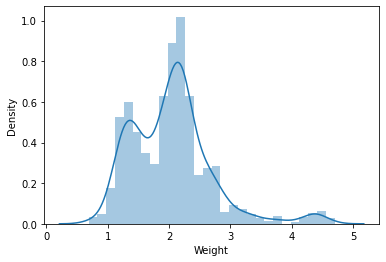

In [77]:
sns.distplot(df["Weight"])

<AxesSubplot:xlabel='Weight', ylabel='Price'>

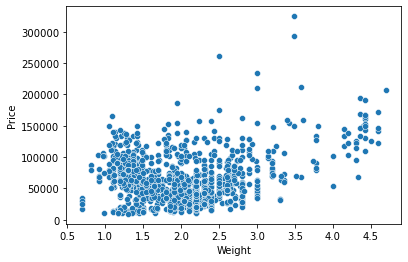

In [78]:
sns.scatterplot(x=df["Weight"],y=df["Price"])

In [79]:
df.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

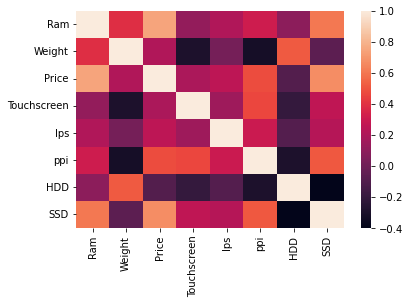

In [80]:
sns.heatmap(df.corr())

C:\Users\ankit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

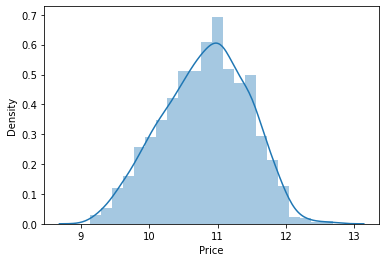

In [81]:
sns.distplot(np.log(df["Price"]))

In [82]:
X=df.drop(columns=["Price"])
y=np.log(df["Price"])

In [83]:
X

,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/Linux/No OS
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [84]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=2)

In [86]:
x_train


,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/Linux/No OS
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/Linux/No OS


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [88]:
!pip install xgboost

In [89]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [90]:
# LinearRegression

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=LinearRegression()

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8073277448418701
MAE:  0.21017827976428766


In [91]:
np.exp(0.21)

1.2336780599567432

In [92]:
## RidgeRegression

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=Ridge(alpha=10)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))


R2 score:  0.8127331031311811
MAE:  0.20926802242582962


In [93]:
## Lasso

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=Lasso(alpha=0.001)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8071853945317105
MAE:  0.21114361613472565


In [94]:
# Knn

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=KNeighborsRegressor(n_neighbors=3)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8021984604448553
MAE:  0.19319716721521116


In [95]:
## Decision tree

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=DecisionTreeRegressor(max_depth=8)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8398556791528466
MAE:  0.18298862246040035


In [96]:
## SVM

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=SVR(kernel="rbf",C=10000,epsilon=0.1)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8083180902289917
MAE:  0.2023905942719158


In [97]:
# Random forest

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,
                           max_features=0.75,max_depth=15)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8873402378382488
MAE:  0.15860130110457718


In [98]:
## AdaBoost

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.7991069809900699
MAE:  0.22664416520523123


In [99]:
## Gradient Boost

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=GradientBoostingRegressor(n_estimators=500,max_features=0.5)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8923227733986304
MAE:  0.15192048152497525


In [100]:
## XGboost

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

step2=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8811773435850243
MAE:  0.16496203512600974


In [101]:
## Voting Regressor

from sklearn.ensemble import VotingRegressor,StackingRegressor

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

rf=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,
                           max_features=0.75,max_depth=15)
gbdt=GradientBoostingRegressor(n_estimators=500,max_features=0.5)
xgb=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
lr=LinearRegression()



step2=VotingRegressor([("rf",rf),("gbdt",gbdt),("xgb",xgb),("lr",lr)],weights=[5,1,1,1])

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))

R2 score:  0.8936458883312393
MAE:  0.15621571331907627


In [102]:
## Stacking

step1=ColumnTransformer(transformers=[
    ("col_tnf",OneHotEncoder(sparse=False,drop="first"),[0,1,7,10,11])
    
],remainder="passthrough")

estimators=[
    ("rf",RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,
                           max_features=0.75,max_depth=15)),
     ("gbdt",GradientBoostingRegressor(n_estimators=500,max_features=0.5)),
     ("xgb",XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5))

    
]



step2=StackingRegressor(estimators=estimators,final_estimator=Ridge(alpha=100))

pipe= Pipeline([("step1",step1),("step2",step2)])

pipe.fit(x_train,y_train)

y_pred=pipe.predict(x_test)

print("R2 score: ",r2_score(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))


R2 score:  0.8944784033694376
MAE:  0.15539529737587035


In [103]:
## Exporting the Model

import pickle

pickle.dump(df,open("df.pkl","wb"))
pickle.dump(pipe,open("pipe.pkl","wb"))